<a href="https://colab.research.google.com/github/tomcat472/ML_on_GIS/blob/main/ML_on_GIS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [3]:
# original datasets ထဲမှ world map အား သုံးခြင်း
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
# area တွက်ထုတ်ခြင်း
world['area']=world.geometry.apply(lambda x:x.area)
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984


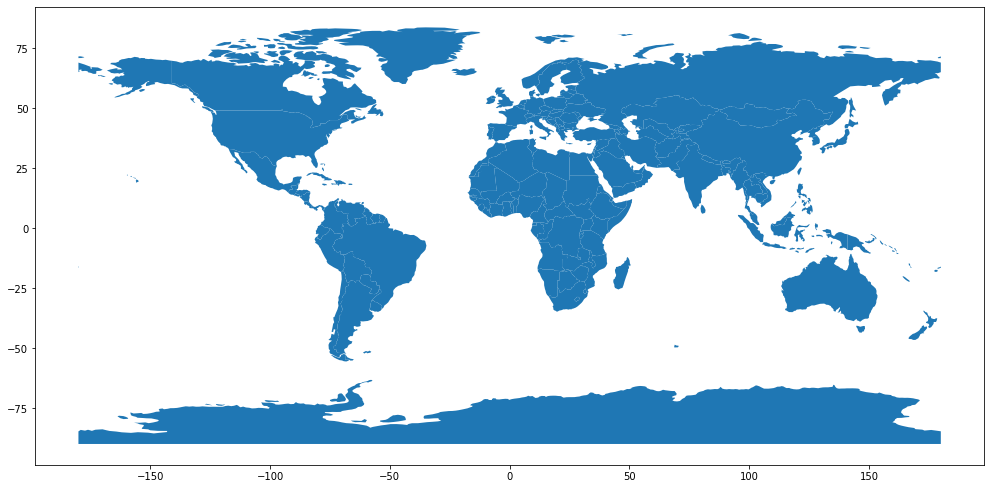

In [5]:
plt.rcParams['figure.figsize']=[17,10]
world.plot()
# rcParams method က notebook ထဲမှာ larger output size ကိုထုတ်ပေးပါတယ်။

Text(0.5, 1.0, 'Area per country')

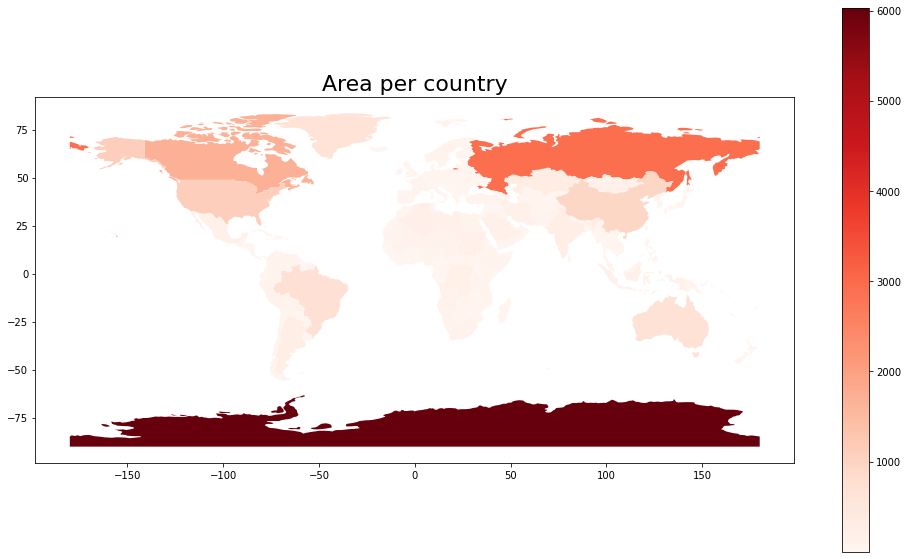

In [6]:
# plot လုပ်ထားသည့် မြေပုံအား အရောင်ထည့်ခြင်း
world.plot(column='area',cmap='Reds',legend=True)
plt.title('Area per country',size=22)

In [7]:
# အထက်ပါနည်းဖြင့် မိမိ၏ shape file အားအသုံးပြုခြင်း
# ပထမဆုံးအနေဖြင့် google drive နဲ့ link ချိတ်ရပါမယ်။
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
mm=gpd.read_file('/content/drive/MyDrive/Shape File/mmr_polbnda_250k_adm3_mimu.shp')
mm.head(2)

,OBJECTID,ST,ST_PCODE,DT,DT_PCODE,TS,TS_PCODE,SELF_ADMIN,ST_RG,TS_MMR4,geometry
0,313.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Ramree,MMR012013,None,State,áááºá¸áá¼á²,"MULTIPOLYGON (((93.99586 18.74753, 93.99853 18..."
1,292.0,Rakhine,MMR012,Thandwe,MMR012D004,Toungup,MMR012016,None,State,áá±á¬ááºáá¯ááº,"MULTIPOLYGON (((94.04611 19.02329, 94.04125 19..."


In [9]:
mm['area']=mm.geometry.apply(lambda x:x.area)
mm.head(3)

,OBJECTID,ST,ST_PCODE,DT,DT_PCODE,TS,TS_PCODE,SELF_ADMIN,ST_RG,TS_MMR4,geometry,area
0,313.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Ramree,MMR012013,None,State,áááºá¸áá¼á²,"MULTIPOLYGON (((93.99586 18.74753, 93.99853 18...",0.100458
1,292.0,Rakhine,MMR012,Thandwe,MMR012D004,Toungup,MMR012016,None,State,áá±á¬ááºáá¯ááº,"MULTIPOLYGON (((94.04611 19.02329, 94.04125 19...",0.411297
2,314.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Kyaukpyu,MMR012011,None,State,áá»á±á¬ááºáá¼á°,"MULTIPOLYGON (((93.83290 19.25509, 93.82447 19...",0.100433


Text(0.5, 1.0, 'Area per Township')

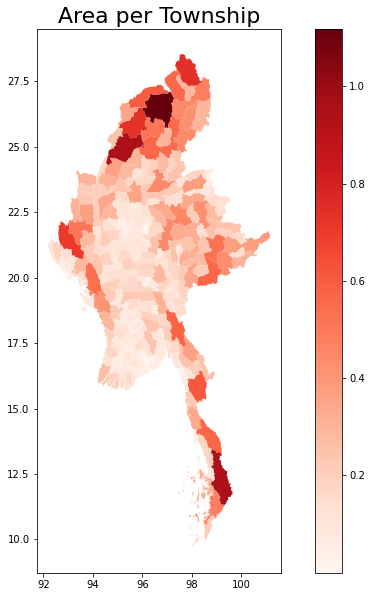

In [10]:
plt.rcParams['figure.figsize']=[12,10]
mm.plot(column='area',cmap='Reds',legend=True)
plt.title('Area per Township',size=22)

In [11]:
# point data များအသုံးပြုခြင်း
# လောလောဆယ်တော့ သူ့ရဲ့ original dataset တွေထဲက တခုကိုပဲအသုံးပြုပါမယ်။
cities=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head(2)

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)


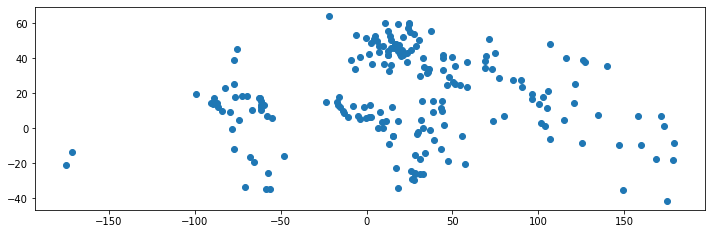

In [12]:
cities.plot()

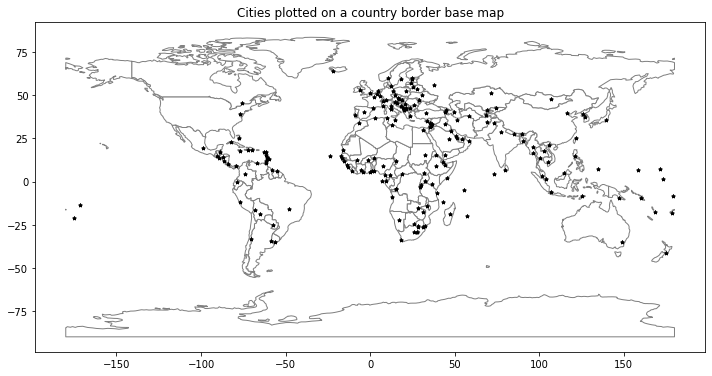

In [13]:
# point shp file ၏အောက်တွင် polygon shp file အား ထားခြင်း
plt.rcParams['figure.figsize']=[12,10]

fig,ax=plt.subplots() #matplotlib oop
ax.set_aspect('equal')
world.plot(ax=ax,color='white',edgecolor='grey')
cities.plot(ax=ax,marker='*',color='k',markersize=13)
plt.title('Cities plotted on a country border base map');

In [14]:
# (23-8-2022)